
# <center> Project 1 - Red Wine Classification  <center>

<hr style="border:2px  solid black"> </hr>

<hr style="border:.03px  solid black"> </hr>

### TABLE OF CONTENTS
    
1. [Importing the libraries](#lib_import)
2.[Exploring the 'Wine' Dataset](#explore-ds)
3.[Data Preparation](#data_prep)
    * [Check for null values](#null)
    *[Check for outliers](#outliers)
    *[Correlation heatmap](#heatmap)
    *[Target variable distribution](#imb)
    *[Check the distribution of data using histograms](#hist)
    
4. [Data Sampling and Label Encoding](#dsle)
    * [Data Sampling](#ds)
    * [Label Encoding](#le)

5. [Data Modelling](#dm)
    * [Train_test_split](#tts)
    * [Standardizing the features](#scal)
    * [Implementing the DNN model](#lm)
    
        * [TF Estimator](#esti)
        * [TF Keras](#keras)
        
    
6. [Model Evaluation](#me)
    
7. [Conclusion](#cln)

8. [Overall Observation](#ob)


<hr style="border:.1px  solid  gray"> </hr>

## <CENTER> IMPORTING THE LIBRARIES<a name="lib_import"></a>


<hr style="border:01px  solid gray"> </hr>

In [1]:
#import the libraries
import pandas as pd
import numpy as np
import sklearn

#importing the library for visulasing
import seaborn as sns 
import matplotlib.pyplot as plt 


#import library for scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

#import librairies for boxcox power transformation
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from scipy.stats import skew, norm, probplot, boxcox, f_oneway

#importing keras library
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.metrics import sparse_categorical_accuracy
from tensorflow.keras.optimizers import Adam

#from keras import regularizers
from tensorflow.keras import regularizers

#from tensorflow.keras.layers.core import Dropout
from tensorflow.keras.layers import Dropout

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


In [2]:
#read the csv file
df = pd.read_csv("winequality-red.csv")

In [3]:
df.tail()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


<hr style="border:01px  solid gray"> </hr>

## <center>EXPLORING THE WINE DATASET<a name="explore-ds"></a>
    

<hr style="border:01px  solid gray"> </hr>

Here, we would be exploring the dataset in general, like the below: 

* Shape, column names and size of the dataset
* Unique values of target variable. 
* Descirptive statistics.
* Datatype and overview . 
* Count of values of each feature and the target variable.


In [4]:
#get the shape of the ds
df.shape

(1599, 12)

In [5]:
#get the descriptive stats of the ds
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
#get the ds info on dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
#get the unique value of the target label 'quality' 
print( "Unique values in target variable 'Quality'are :" , df.quality.unique())

Unique values in target variable 'Quality'are : [5 6 7 4 8 3]


In [8]:
#get the column names
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

***

**OBSERVATION**

* From the above cells, we infer that the red wine dataset has 1599 rows with 12 columns. 
* In `cell 4`, the shape is retreived.
* The datatype is obtained from the `info()` keyword, which states they are numeric values(Independent features are Float and the dependent feature is integer).
* In `cell 6`, `describe()` , shows the descriptive statistics of the data set. It is eveident that the overall values range beween 0 to 300. 
* Also, in `cell 7` , we check for the unique values present in all the features. 
* `Cell 8`, the column names are retrieved.
***

<hr style="border:01px  solid gray"> </hr>

## <center>DATA PREPARATION <a name="data_prep"></a>

<hr style="border:01px  solid gray"> </hr>


In this section, we will be performing data preparation steps like the below: 
1. [Check for null values](#null)
2. [Check for outliers](#outliers)
3. [Implement Correlation heatmap](#heatmap)
4. [Check for target variable distribution](#imb)
5. [Check the distribution of data using histograms](#hist)


***

### 1. Check for NULL , Nan and missing values : <a name="null"></a>

In [9]:
#check for null values
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
#check for Nan values
df.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
#duplicate values and Nan are checked for :
print("\nCHECK FOR DUPLICATE VALUES:\n",df.duplicated().value_counts())
print()
print()
print("GET THE DUPLICATE VALUE:\n", df[df.duplicated(keep=False)])


CHECK FOR DUPLICATE VALUES:
 False    1359
True      240
dtype: int64


GET THE DUPLICATE VALUE:
       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
4               7.4             0.700         0.00             1.9      0.076   
9               7.5             0.500         0.36             6.1      0.071   
11              7.5             0.500         0.36             6.1      0.071   
22              7.9             0.430         0.21             1.6      0.106   
...             ...               ...          ...             ...        ...   
1567            7.2             0.695         0.13             2.0      0.076   
1579            6.2             0.560         0.09             1.7      0.053   
1581            6.2             0.560         0.09             1.7      0.053   
1592            6.3             0.510         0.13             2.3      0.076   
1596      

In [12]:
#check duplicate and remove if found
print("\n\nSHAPE BEFORE ELIMINATING DUPLICATE VALUES:" , df.shape)
df.drop_duplicates(inplace = True)
print("\nSHAPE AFTER ELIMINATING DUPLICATE VALUES:" , df.shape)



SHAPE BEFORE ELIMINATING DUPLICATE VALUES: (1599, 12)

SHAPE AFTER ELIMINATING DUPLICATE VALUES: (1359, 12)


***

<b>OBSERVATION:</b> 

* The above cells shows there is no missing value and no Nan, in the dataset indicting it's a clean dataset. 
But when checked for duplicates, we find about 240 duplicate values are present. In `cell 11`, bool value `False = 240`is  returned.
* In `Cell 12`, the dupliacte values are removed and the **new shape after deletion is 1359 rows.** 

***

###  2. Check for Outliers : <a name="outliers"></a>

In [13]:
#outlier detection


from collections import Counter 
features = df.columns.values.tolist()
features.remove("quality")

outlier_index = list()

for feature in features:
    
    q1 = np.percentile(df[feature], 25)
    q3 = np.percentile(df[feature], 75)
    
    iqr = q3 - q1
    
    step = iqr * 1.5
    
    lower_bound = q1 - step
    upper_bound = q3 + step
    
# List of indices where the attribute value lies outside the bounds
feature_outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)].index
outlier_index.extend(feature_outliers)
outlier_index = Counter(outlier_index) 

In [14]:
outlier_list = [index for index, count in outlier_index.items() if count > 0]

print(f"Found {len(outlier_list)} outliers in the entire dataset.")

Found 12 outliers in the entire dataset.


In [15]:
df.loc[outlier_list]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,6
467,8.8,0.46,0.45,2.6,0.065,7.0,18.0,0.99470,3.32,0.79,14.000000,6
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.000000,8
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.900000,5
821,4.9,0.42,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.000000,7
1114,5.0,0.40,0.50,4.3,0.046,29.0,80.0,0.99020,3.49,0.66,13.600000,6
1132,7.4,0.36,0.34,1.8,0.075,18.0,38.0,0.99330,3.38,0.88,13.600000,7
1228,5.1,0.42,0.00,1.8,0.044,18.0,88.0,0.99157,3.68,0.73,13.600000,7
1269,5.5,0.49,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,14.000000,8
1270,5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.000000,6


In [16]:
df = df.drop(outlier_list, axis=0).reset_index(drop=True)
df.shape

(1347, 12)

***

<b>OBSERVATION:</b>

* In this section, outlier check is done in the 25th ,75th percentile boundary. 
* Cell 14, shows 12 outliers are present above the range 0. 
* The shape is 1347 after outlier removal.

***

### 3. Check for Correlation :  
<a name="heatmap"></a>

<AxesSubplot:>

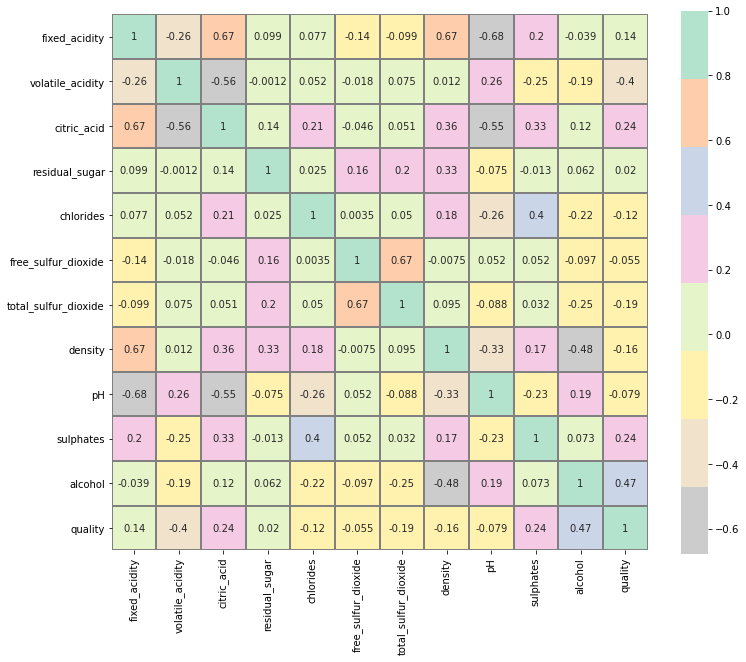

In [17]:
#correlation heatmap
plt.figure(figsize=[12,10])
sns.heatmap(data= df.corr(),  annot= True , fmt='.2g',cmap="Pastel2_r" , linewidths=1,linecolor='grey' , square=True)

<AxesSubplot:>

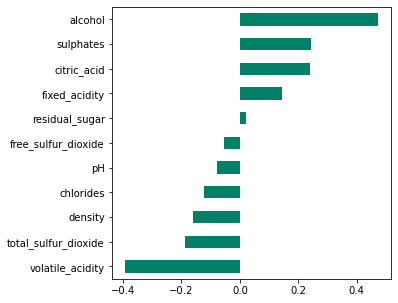

In [18]:
df.corr()['quality'][:-1].sort_values().plot(kind = 'barh',figsize = (5,5), colormap = 'summer')

***


<b>OBSERVATION:</b> 

1. From the Heatmap, `cell 17` we infer that ,
    * the target variable`quality` is positively correlated with `alcohol`(0.48), `sulphates`(0.27) and `citric acid`(0.24) and is *strongly negatively correlated* with `volatile acidity`(-0.39) ,`total suphur dioxide` & `density`(0.18).
    * With the remaining features, *Quality* shows a weak correlation.
    * Also , other independent features are dependent on each other like, **multicollinearity exists**, i.e., `fixed acidity` has a strong correlation with `citric acid` and `density`(0.67). `Ph` is strongly negatively correlated with `fixed acididty`(-0.68) and `citric acid`(0.55) . `Free sulphur dioxide` positively strongly correlated with `total sulphur di oxide`(0.66).

2. From the Barplot, `cell 18`
    * we can clearly see the features with neagtive and positive correlation . Horizontal Bar plot is obtained using pandas. 
    * We can see that `alcohol` has the highest positive corrrelation level while `volatile acidity` highest negative correlation.


***

### 4. Check for distribution of the target variable 'Quality' : 
<a name="imb"></a>

<AxesSubplot:xlabel='quality', ylabel='Density'>

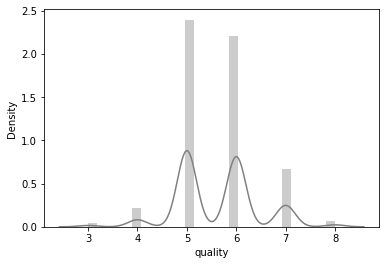

In [19]:
#checking  the frequency of the target variable- Quality
sns.distplot(df['quality'], color= "gray")


<AxesSubplot:xlabel='quality', ylabel='count'>

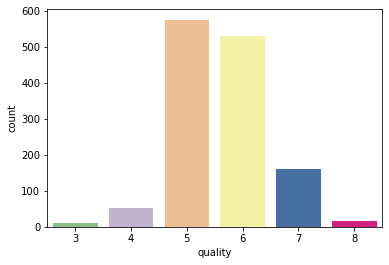

In [20]:
# To check for class imabalance distribution in target variable'Quality'
sns.countplot(x ='quality' , data = df, palette = "Accent")

In [21]:
df['quality'].value_counts()

5    576
6    531
7    162
4     53
8     15
3     10
Name: quality, dtype: int64

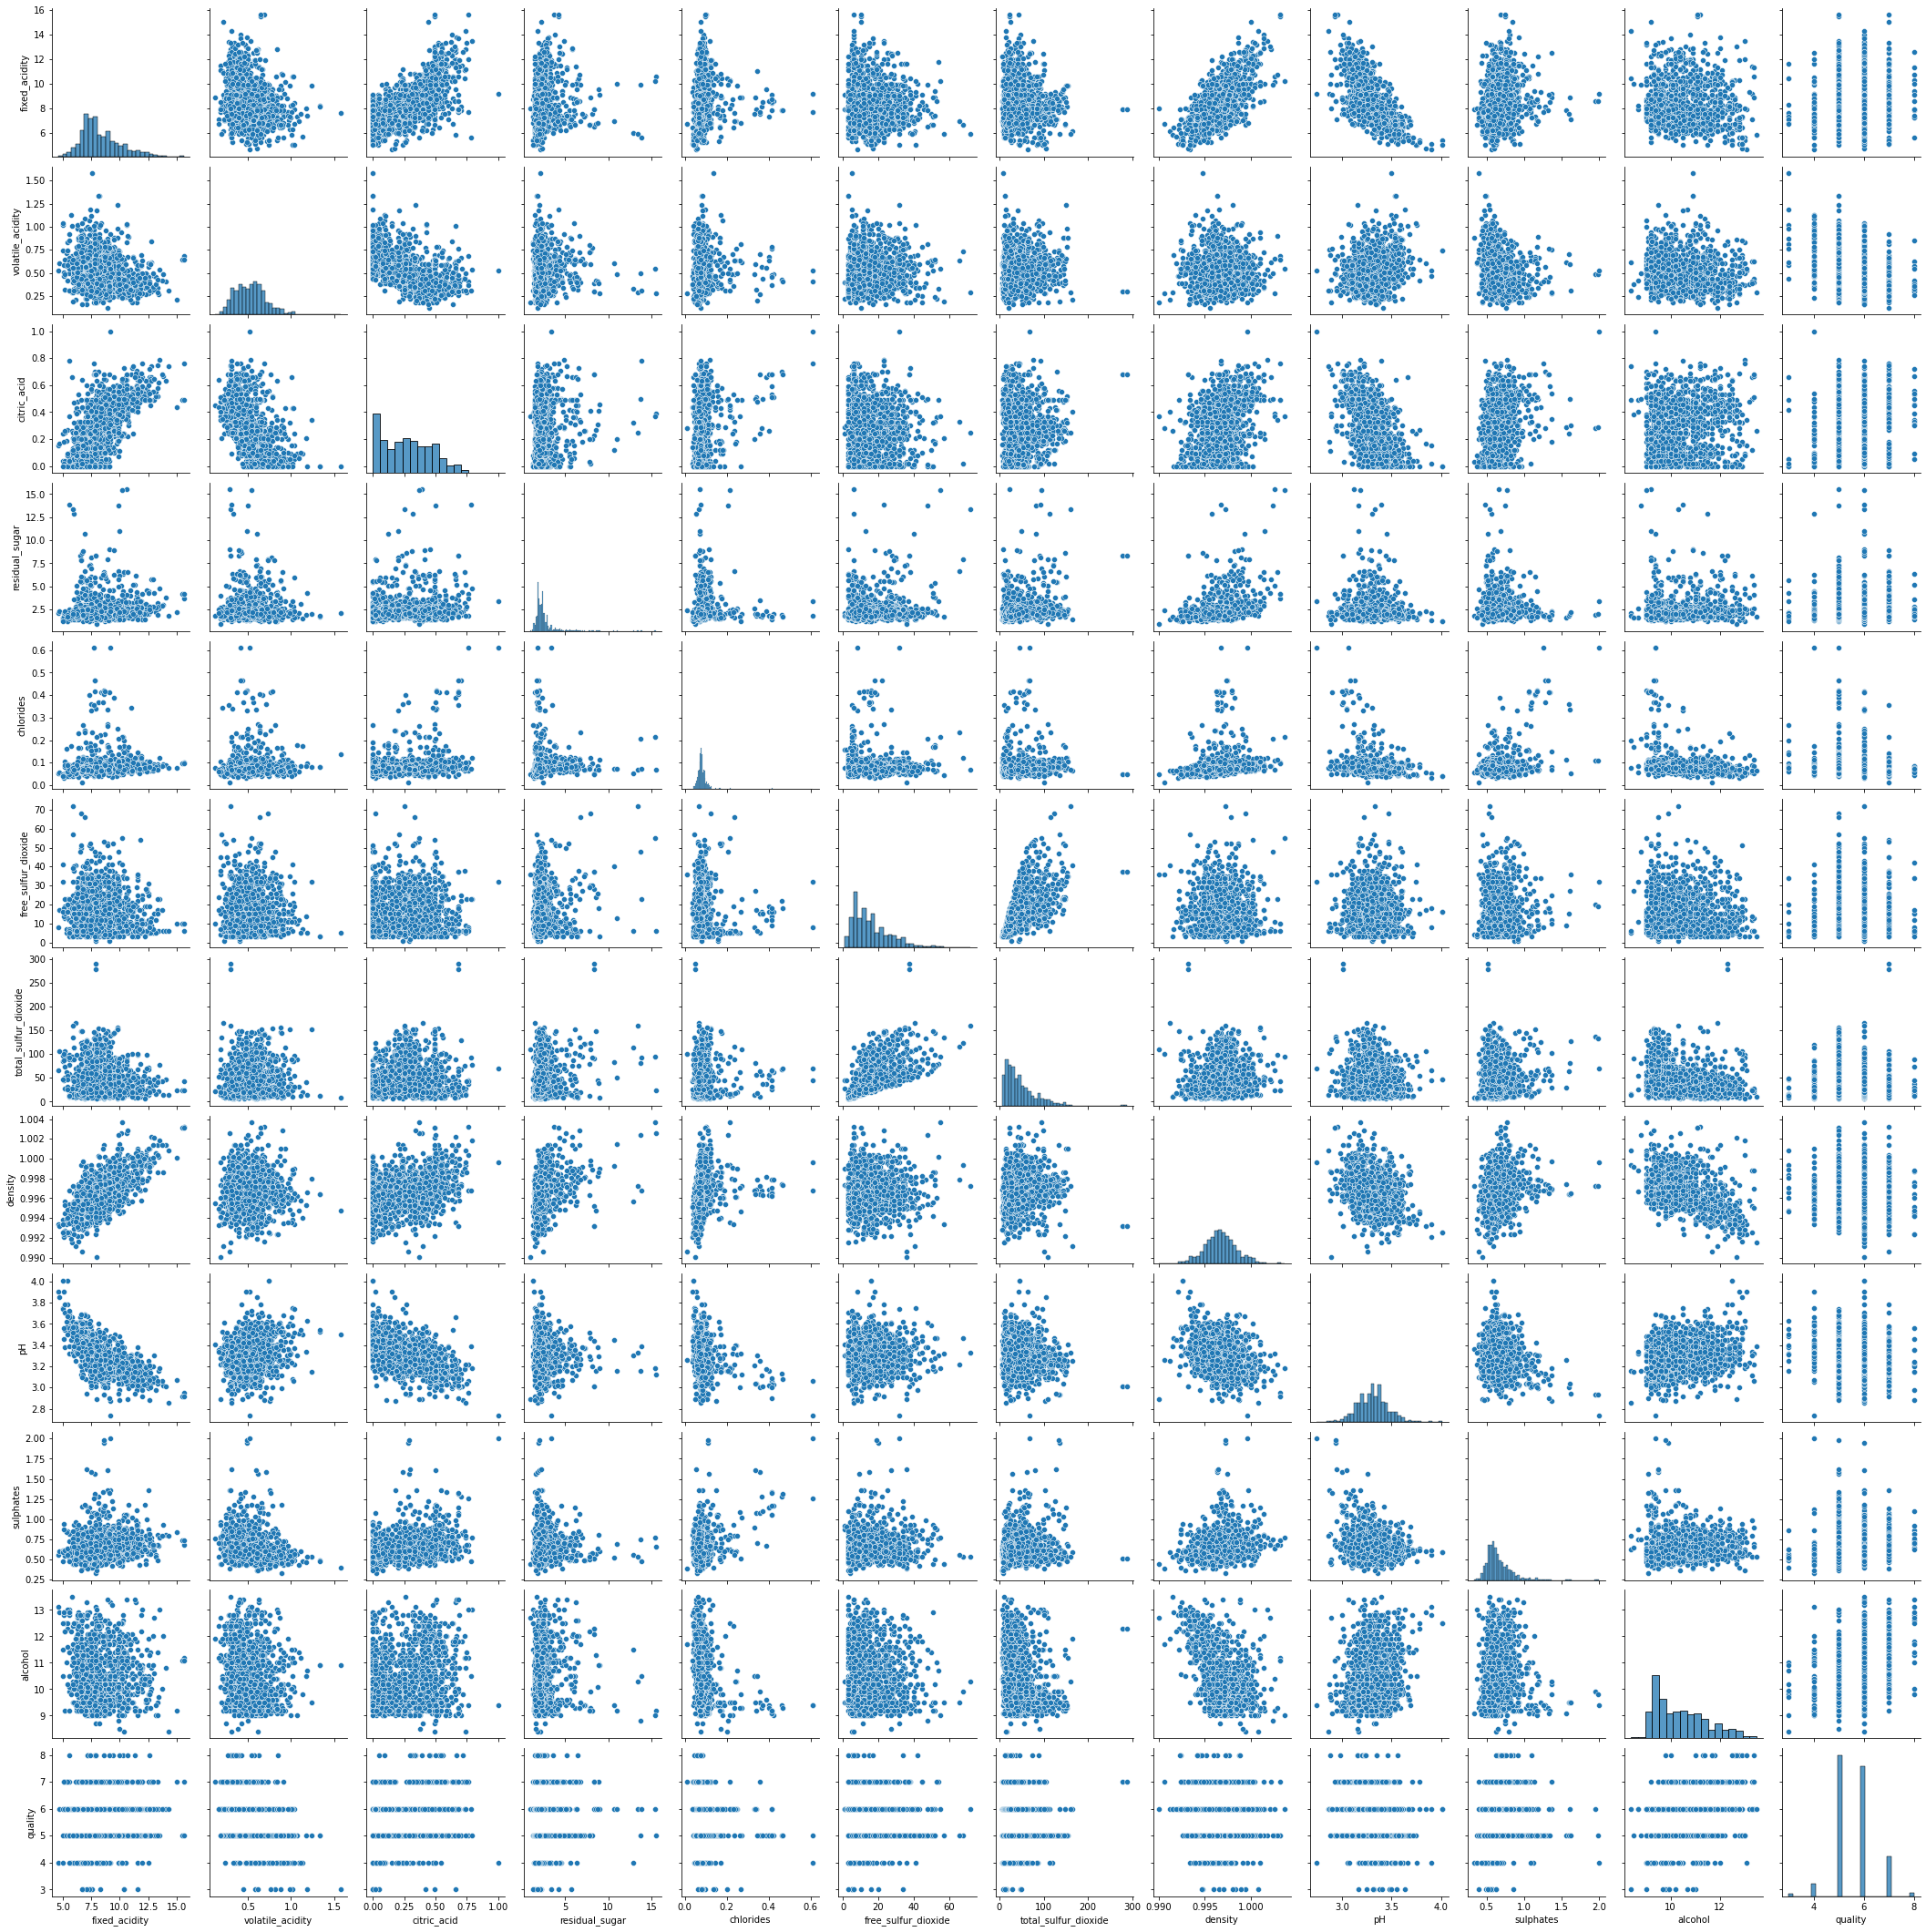

In [22]:
sns.pairplot(df)

***
<b>OBSERVATION:</b>

1. We have used a `distplot`, to depict the variations in the target variable. 
    * We observe that the dirstibution is more concentrated between 4 and 7 with higher frequency in 5 ,6.
    * It is imablanced.
2. Next, to view the class imbalance, `countplot` is used.
    * It depicts that 5 and 6 values have more count when compared to 3,4,7 and 8.
    * Also, the unique `value_counts()` are got in `cell 21`, to get the exact values. 
    * We can say,maximum value is present in `quality==5` which is 571 and the least in `quality==3` which has 10 values. 
3. Pairplot is used to observe the distribution and correlation.


### 5. Histogram Plots:

<a name="hist"></a>

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='F

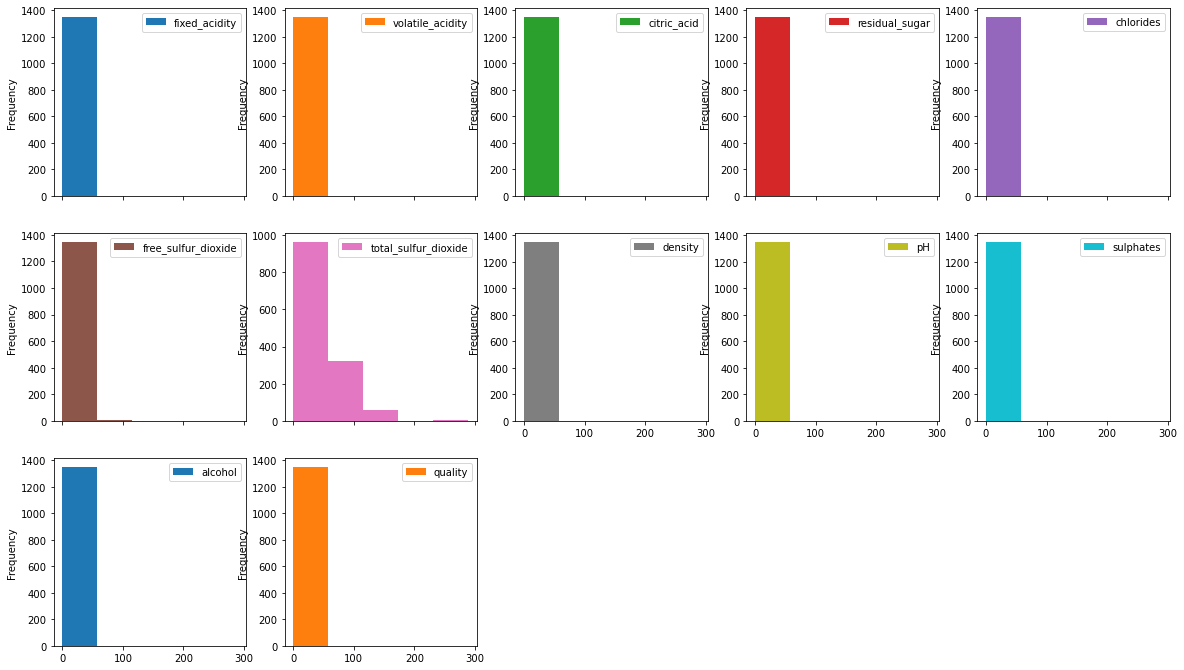

In [23]:
#histogram plotting using pandas
df.plot.hist(subplots=True, layout=(5 , 5), figsize=(20, 20), bins=5)

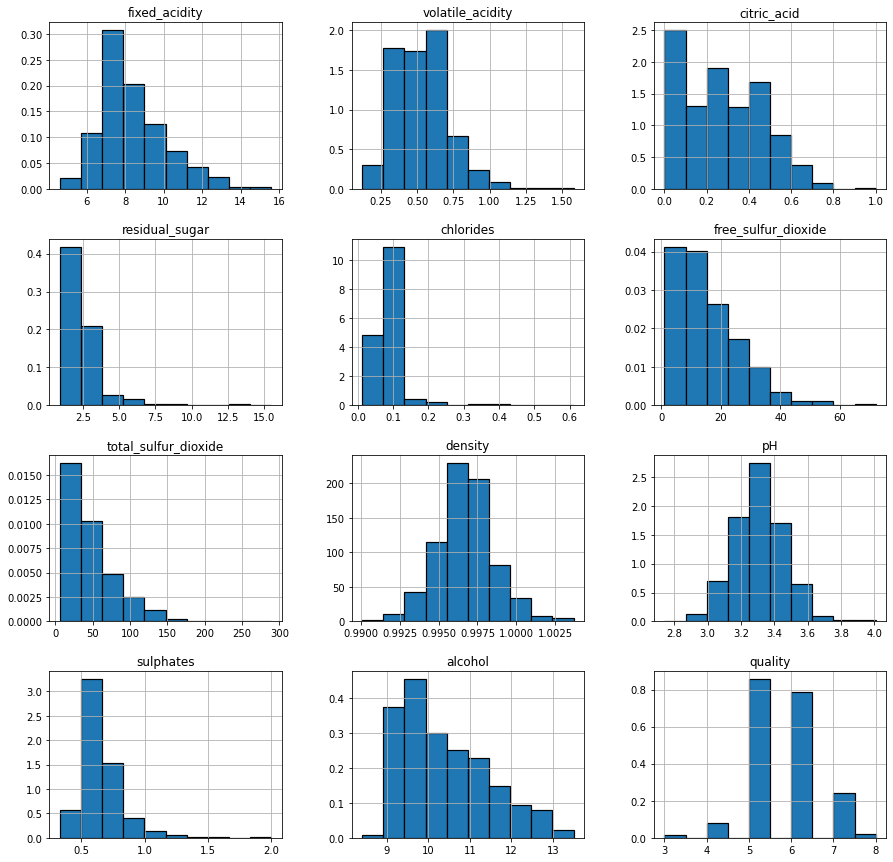

In [24]:
#histogram plotting using pandas

df.hist(edgecolor='black', linewidth=1.2 , density = True)
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.show()

***

<b>OBSERVATION:</b>

From the above histogram, 
* We can infer that, most of the features are not evenly distributed. 
* Most features exhibits highest right skewness, from `cell 23`
* `Density` shows a normal distribution.

<u>**NOTE**</u> Transforming the features would be mandatory to bring them in range prior prediction because of uneven distribution.



***

### 6. Data Transformation:

<a name="Tran"></a>

In the below section , skewness is checked for and boxcox transformation is applied

In [25]:
#to check for skew values first

#import librairies for boxcox power transformation
from scipy.stats import skew
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
# from scipy.stats import skew, norm, probplot, boxcox, f_oneway

numeric_feats = df.dtypes[df.dtypes != "object"].index

skewed_feats = df[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)

print("BEFORE SKEWING:\n\n\n",skewed_feats)

BEFORE SKEWING:


 chlorides               5.496374
residual_sugar          4.574749
sulphates               2.431262
total_sulfur_dioxide    1.554983
free_sulfur_dioxide     1.235282
fixed_acidity           0.939867
alcohol                 0.731272
volatile_acidity        0.716319
citric_acid             0.310326
pH                      0.217910
quality                 0.178225
density                 0.168432
dtype: float64


In [26]:
def fixing_skewness(bct):
    
  
    ## Getting all the data that are not of "object" type. 
    numeric_feats = bct.dtypes[bct.dtypes != "object"].index

    # Check the skew of all numerical features
    skewed_feats = bct[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
    high_skew = skewed_feats[abs(skewed_feats) > 0.2]
    skewed_features = high_skew.index
    print ("The top {}  skewed numerical features to undergo box cox transformation are".format(skewed_features.shape[0]))
    print ("\n\nThey are: " , skewed_features[0:10])
    
 #compute skewness
    skewness = pd.DataFrame({'Skew' :skewed_features})   

    for feat in skewed_features:
        bct[feat] = boxcox1p(bct[feat], boxcox_normmax(bct[feat] + 1))   
        
fixing_skewness(df)

The top 10  skewed numerical features to undergo box cox transformation are


They are:  Index(['chlorides', 'residual_sugar', 'sulphates', 'total_sulfur_dioxide',
       'free_sulfur_dioxide', 'fixed_acidity', 'alcohol', 'volatile_acidity',
       'citric_acid', 'pH'],
      dtype='object')


In [27]:
#to check for skew values first
numeric_feats = df.dtypes[df.dtypes != "object"].index

skewed_feats = df[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)

print("AFTER SKEWING:\n\n\n",skewed_feats)

AFTER SKEWING:


 quality                 0.178225
density                 0.168432
citric_acid             0.139640
alcohol                 0.057964
free_sulfur_dioxide     0.023520
volatile_acidity        0.008458
total_sulfur_dioxide    0.002862
sulphates               0.001389
fixed_acidity           0.000402
pH                     -0.019421
residual_sugar         -0.044945
chlorides              -0.191166
dtype: float64


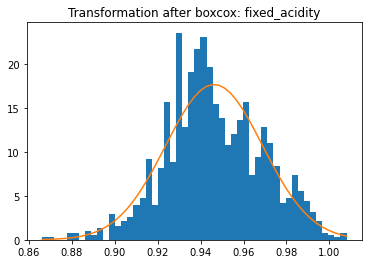

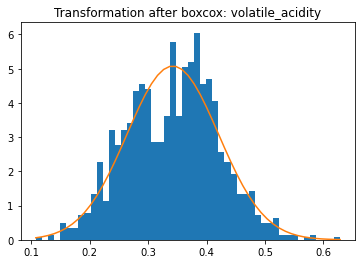

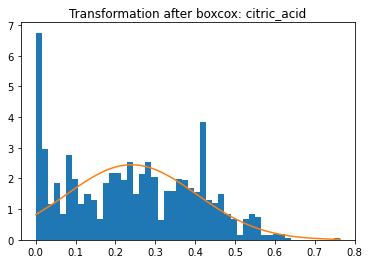

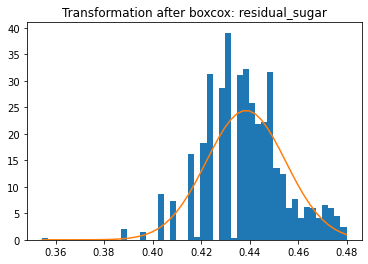

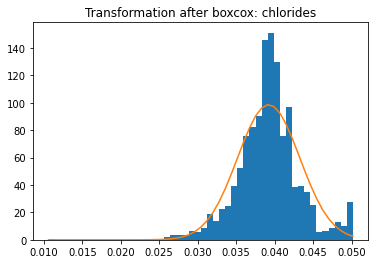

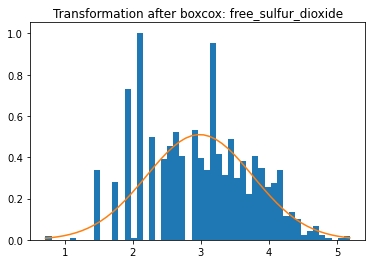

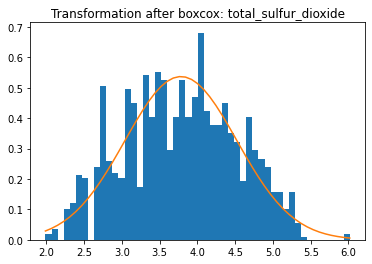

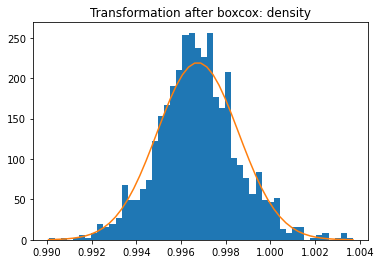

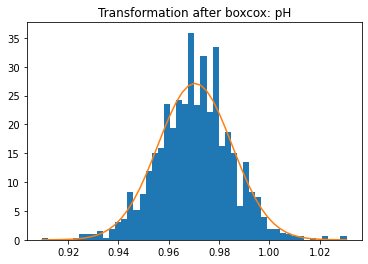

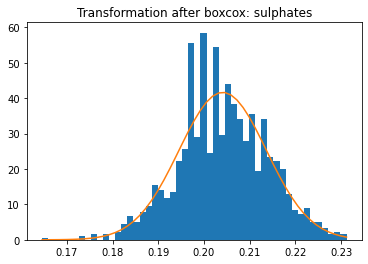

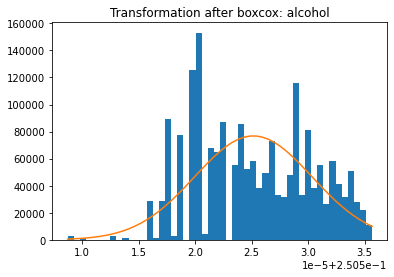

In [28]:
import matplotlib.pyplot as plt
import scipy.stats
from statsmodels.graphics.gofplots import qqplot
import seaborn as sns
%matplotlib inline


for feature in ['fixed_acidity','volatile_acidity', 'citric_acid' ,'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide','density','pH','sulphates','alcohol']:
    
    n, bins, patches = plt.hist(df[feature],50, density=True )
    mu = np.mean(df[feature])
    sigma = np.std(df[feature])
    plt.plot(bins, scipy.stats.norm.pdf(bins, mu, sigma))
    plt.title("Transformation after boxcox: {}".format(feature))
    plt.show()

In [29]:
df.corr()['quality'].sort_values(ascending=False)[1:]

alcohol                 0.463668
sulphates               0.345416
citric_acid             0.241647
fixed_acidity           0.131313
residual_sugar          0.033649
free_sulfur_dioxide    -0.054971
pH                     -0.078360
density                -0.158992
total_sulfur_dioxide   -0.177252
chlorides              -0.187965
volatile_acidity       -0.397505
Name: quality, dtype: float64

*** 
<b>OBSERVATION:</b>



* `Cell 25` produces the values before applying skewing function.
* `Cell 26` , the top 10 skewed numerical features to undergo box cox transformation are obtained. 
* In `Cell 27`, skewness is applied using lambda function and results rae checked for. 
* From the histogram in `cell 24 `,  it is infered that, the residuals aren't normally distributed. Indicating,model suffering suffers from **heavy tails**.
    * Hence , to overcome this issue , we use **BOXCOX TRANSFORMATION** on our features. We infer that 10 features are highly skewed. 
    * After BOXCOX, `cell 28` shows a distribution of the values, after BOXCOX and we can say are features are normally distributed now and can proceed further. We see the values are skewed perfectly.
 
* Although none of the columns show high correlation with the target column, in *cell 29* we can say that Alcohol, Sulphates, Volatile acidity have the highest correlations.
        
***        

<hr style="border:01px  solid gray"> </hr>

## <center>DATA SAMPLING & LABEL ENCODING<a name="dsle"></a>

<hr style="border:01px  solid gray"> </hr>


1. [Data Sampling](#ds)
2. [Label Encoding](#le)


###  1. Data Sampling: <a name="ds"></a>

In [30]:
#value_counts of target variable 
df['quality'].value_counts()

5    576
6    531
7    162
4     53
8     15
3     10
Name: quality, dtype: int64

In [31]:
#assigning each wine quality for sampling
df_3 = df[df.quality==3]     
df_4 = df[df.quality==4]     
df_5 = df[df.quality==5]     
df_6 = df[df.quality==6]  
df_7 = df[df.quality==7]    
df_8 = df[df.quality==8]     


In [32]:
# Oversample MINORITY Class to balance  the data :
from sklearn.utils import resample

df_3_upsampled = resample(df_3, replace=True, n_samples=500, random_state=12) 
df_4_upsampled = resample(df_4, replace=True, n_samples=500, random_state=12) 
df_7_upsampled = resample(df_7, replace=True, n_samples=500, random_state=12) 
df_8_upsampled = resample(df_8, replace=True, n_samples=500, random_state=12) 

# Decrease the rows of Majority class to make the data balanced :
df_5_downsampled = df[df.quality==5].sample(n=500).reset_index(drop=True)
df_6_downsampled = df[df.quality==6].sample(n=500).reset_index(drop=True)

In [33]:
# Display new class counts
Balanced_df = pd.concat([df_3_upsampled, df_4_upsampled, df_7_upsampled, 
                         df_8_upsampled, df_5_downsampled, df_6_downsampled]).reset_index(drop=True)

Balanced_df.quality.value_counts()          

4    500
6    500
8    500
3    500
5    500
7    500
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

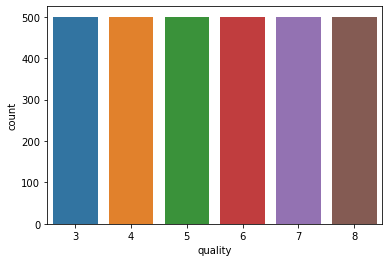

In [34]:
#countplot after resampling
sns.countplot(Balanced_df['quality'])

In [35]:
Balanced_df.head(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0.925036,0.457121,0.000000,0.387807,0.049721,3.208349,3.524210,0.99471,0.972000,0.193412,0.250523,3
1,0.973816,0.384438,0.421559,0.435488,0.048845,1.937233,2.918233,0.99940,0.956208,0.204557,0.250509,3


***

<b>OBSERVATION:</b>


* In `cell 30` , we see that the `value_counts` of  target variable `quality` are highly imabalanced. Resampling method is chosen to make the value counts balanced. Hence, Resampling techniques like **upsampled and downsampled** are performed. 

* In ` cell 32`, minority classes ae oversampled to 500 and majority class are downsampled and is stored in `Balanced_df`. 

* Cell 35, shows the countplot of the resampled distributions.

***

###  2. Label Encoding: <a name="le"></a>

In [36]:
#label encoding the target values
from sklearn.preprocessing import LabelEncoder

label_quality = LabelEncoder()
Balanced_df['quality'] = label_quality.fit_transform(Balanced_df['quality'])

In [37]:
Balanced_df['quality'].value_counts() 

0    500
2    500
4    500
1    500
3    500
5    500
Name: quality, dtype: int64

In [38]:
selected_features = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar','chlorides',
                      'free_sulfur_dioxide','total_sulfur_dioxide', 'density','pH' ,
                     'sulphates', 'alcohol']

***

<b>OBSERVATION:</b>

* Since , wine dataset is a multiclass classification problem, we will be using **sparse_categorical_entropy**  and it accepts only nominal numbers. Hence we used label encoding to acheive the results. 
* The values of ranks are label encoded to nominal values. 

***

<hr style="border:01px  solid gray"> </hr>

## <center>DATA MODELLING<a name="dm"></a>

<hr style="border:01px  solid gray"> </hr>


1. [Train_test_split](#tts)
2. [Standardizing the feature](#scal)
3. [Implementing DNN](#lm) :
    * [TF Estimator](#esti)
    * [TF Keras](#keras)
    

 ### 2. Train_test_split: <a name="tts"></a>

In [39]:
#splitting features and traget variable
X = Balanced_df[selected_features]
y = Balanced_df.quality


In [40]:
X.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [41]:
#shape of X , y
print("X shape :", X.shape)
print("Y shape :", y.shape)


X shape : (3000, 11)
Y shape : (3000,)


In [42]:
# Splitting the data into 80% and 20% to construct Training and Testing Data respectively.
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state= 101)


In [43]:
#print the total samples in train,val and test set
print('There are {} samples in the training set. \n \nThere are {} samples in the test set'.format(X_train.shape[0],X_test.shape[0]))
print()

There are 2400 samples in the training set. 
 
There are 600 samples in the test set



### 2. Standardizing the features: <a name="scal"></a>

In [44]:
#fitting StandardSCaler on train and test set

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


In [45]:
#fitting StandardSCaler on train and test set
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

***


### 3. Implementing deep learning model for prediction : <a name="lm"></a>

a. [TF Estimator DNN CLassifier](#esti)

b. [TF Keras](#keras)

***



##  a. TF estimator  DNN Classifier <a name="esti"></a>



In [46]:
#a feature column is created

def create_feature_column():
    
    feat_fixed_acidity = tf.feature_column.numeric_column('fixed_acidity')
    feat_volatile_acidity = tf.feature_column.numeric_column('volatile_acidity')
    feat_citric_acid = tf.feature_column.numeric_column('citric_acid')
    feat_residual_sugar = tf.feature_column.numeric_column('residual_sugar')
    feat_chlorides = tf.feature_column.numeric_column('chlorides')
    feat_freesulfurdioxide = tf.feature_column.numeric_column('free_sulfur_dioxide')
    feat_totalsulfurdioxide  = tf.feature_column.numeric_column('total_sulfur_dioxide')
    feat_density  = tf.feature_column.numeric_column('density')
    feat_pH  = tf.feature_column.numeric_column('pH')
    feat_sulphates  = tf.feature_column.numeric_column('sulphates')
    feat_alcohol  = tf.feature_column.numeric_column('alcohol')
    
    feature_column = [feat_fixed_acidity, feat_volatile_acidity, feat_citric_acid, 
                  feat_residual_sugar, feat_chlorides, 
                 feat_freesulfurdioxide , feat_totalsulfurdioxide,feat_density,
                   feat_pH , feat_sulphates, feat_alcohol] 
    
    return feature_column

In [47]:
# input_fn , evaluate fn and predict fn creation
feature_column = create_feature_column()


input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(X_train, 
                                                 y_train,
                                                 batch_size=500,
                                                 num_epochs=1000,
                                                 shuffle=True)

eval_func = tf.compat.v1.estimator.inputs.pandas_input_fn(X_test,
                                               y_test,
                                               batch_size=256,
                                               num_epochs=100,
                                               shuffle=False)

predict_input_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(
      x=X_test,
      num_epochs=1,
      shuffle=False)

optimizer_adam = tf.keras.optimizers.Adam(learning_rate=0.01)


In [48]:
#dnnmodel is initialized
dnnmodel = tf.estimator.DNNClassifier(
                                        hidden_units = [1024,512,64],
                                        feature_columns = feature_column,
                                        n_classes=6,
                                        dropout=None,
                                        activation_fn= tf.nn.relu6,
                                        optimizer= optimizer_adam                                        
                                    )

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Hp\\AppData\\Local\\Temp\\tmpceqfn6ra', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [49]:
# train dnn model
history = dnnmodel.train(input_fn=input_func, 
               steps=1000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Hp\AppData\Local\Temp\tmpceqfn6ra\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 1.836887, step = 0
INFO:tensorflow:global_step/sec: 42.2254
INFO:tensorflow:loss = 1.38590

In [50]:
# dnn model evaluation
eval_results = dnnmodel.evaluate(eval_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-10-10T01:52:18
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Hp\AppData\Local\Temp\tmpceqfn6ra\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 2.04354s
INFO:tensorflow:Finished evaluation at 2021-10-10-01:52:20
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.68833333, average_loss = 0.73871183, global_step = 1000, loss = 0.7383449
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\Hp\AppData\Local\Temp\tmpceqfn6ra\model.ckpt-1000


In [51]:
#print the evaluated results
print(eval_results)

{'accuracy': 0.68833333, 'average_loss': 0.73871183, 'loss': 0.7383449, 'global_step': 1000}


In [52]:
#prediction function call
from sklearn.metrics import classification_report
predictions = list(dnnmodel.predict(input_fn=predict_input_fn))
prediction = [p["class_ids"][0] for p in predictions]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Hp\AppData\Local\Temp\tmpceqfn6ra\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [53]:
#classification report
data = classification_report(y_test,prediction)
print(data)

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       114
           1       0.64      0.82      0.72        89
           2       0.50      0.56      0.53       100
           3       0.39      0.25      0.31        91
           4       0.65      0.60      0.62       113
           5       0.87      1.00      0.93        93

    accuracy                           0.69       600
   macro avg       0.67      0.69      0.67       600
weighted avg       0.68      0.69      0.68       600



*** 
**OBSERVATION:**


1. The dataset is split into 80 :20 ratio in `cell 42`. We check for the shape values in `cell 41`.
    * Train set has 2400 samples which is 80% of the total (3000 samples) and test set has 600 samples, `cell 43`
    

2. Data scaling is done to bring the values in range.
 	* `cell 46` shows the values before and after scaling. 


3.  **a.DNNClassifier** is created in `cell 48` with three hidden layers, first hidden layer with 1024 units, second hidden layer with 512 units and third hidden layer with 64 units.The feature column parameter takes all the input features. 
    * ALso, `ReLU` activation function and `ADAM` optimization is used.

    * For train function, batch size = 500  and epoch = 1000 is passed
    * For eval function , batch size = 256 and epoch =100 is passed
    * finally for pedict input function , 1 epoch is passed.
    * DNN model is trained with 1000 steps and by passing the `input train function`. 
    * Results are evaluated by passing the `evaluate function` and results are printed in `eval_results`.
    * Classification report is printed for model evaluation.
    * **Loss** has decreased from 1.82 to 0.76.
    * **Accuracy** achieved is 69% on the test data.



**NOTE** TF estimators are high level api , and isn't well suited for this dataset as TF estimators are capable of doing high computational. Therefore, performance could be imporved by having more data.

***

## b. TF keras  <a name="keras"></a>

In [54]:
#splitting features and traget variable
X = Balanced_df[selected_features]
y = Balanced_df.quality


In [55]:
# Splitting the data into 80% and 20% to construct Training and Testing Data respectively.
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state= 42)


In [56]:
#fitting StandardSCaler on train and test set

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [57]:
#import lib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.metrics import sparse_categorical_accuracy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

#initializing the neural network
model = Sequential([
                    Dense(units = 32 , kernel_regularizer=regularizers.l2(0.0001) , activation = 'relu'), 
                    Dense(units = 16 ,kernel_regularizer=regularizers.l2(0.0001), activation = 'relu'),
                    Dense(units = 8,  kernel_regularizer=regularizers.l2(0.0001), activation = 'relu'),   
                    Dense(6,activation = 'softmax')
                    ])

In [58]:
#compiling the ann model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [59]:
#fitting the ann model on our validation set

history = model.fit(X_train , y_train , batch_size = 350, epochs = 200 , validation_data = (X_test,y_test))


Epoch 1/200
7/7 [==============================] - 1s 59ms/step - loss: 1.9088 - accuracy: 0.1446 - val_loss: 1.8370 - val_accuracy: 0.2000
Epoch 2/200
7/7 [==============================] - 0s 23ms/step - loss: 1.8377 - accuracy: 0.1892 - val_loss: 1.7846 - val_accuracy: 0.2167
Epoch 3/200
7/7 [==============================] - 0s 26ms/step - loss: 1.7911 - accuracy: 0.2083 - val_loss: 1.7492 - val_accuracy: 0.2333
Epoch 4/200
7/7 [==============================] - 0s 34ms/step - loss: 1.7565 - accuracy: 0.2350 - val_loss: 1.7236 - val_accuracy: 0.2667
Epoch 5/200
7/7 [==============================] - 0s 33ms/step - loss: 1.7321 - accuracy: 0.2467 - val_loss: 1.7020 - val_accuracy: 0.2700
Epoch 6/200
7/7 [==============================] - 0s 32ms/step - loss: 1.7098 - accuracy: 0.2550 - val_loss: 1.6805 - val_accuracy: 0.2700
Epoch 7/200
7/7 [==============================] - 0s 7ms/step - loss: 1.6890 - accuracy: 0.2704 - val_loss: 1.6604 - val_accuracy: 0.3017
Epoch 8/200
7/7 [====

7/7 [==============================] - 0s 6ms/step - loss: 0.5623 - accuracy: 0.7788 - val_loss: 0.5907 - val_accuracy: 0.7500
Epoch 118/200
7/7 [==============================] - 0s 5ms/step - loss: 0.5600 - accuracy: 0.7763 - val_loss: 0.5877 - val_accuracy: 0.7600
Epoch 119/200
7/7 [==============================] - 0s 6ms/step - loss: 0.5584 - accuracy: 0.7763 - val_loss: 0.5867 - val_accuracy: 0.7650
Epoch 120/200
7/7 [==============================] - 0s 5ms/step - loss: 0.5561 - accuracy: 0.7792 - val_loss: 0.5848 - val_accuracy: 0.7600
Epoch 121/200
7/7 [==============================] - 0s 6ms/step - loss: 0.5538 - accuracy: 0.7833 - val_loss: 0.5825 - val_accuracy: 0.7633
Epoch 122/200
7/7 [==============================] - 0s 6ms/step - loss: 0.5524 - accuracy: 0.7821 - val_loss: 0.5808 - val_accuracy: 0.7667
Epoch 123/200
7/7 [==============================] - 0s 7ms/step - loss: 0.5502 - accuracy: 0.7850 - val_loss: 0.5790 - val_accuracy: 0.7683
Epoch 124/200
7/7 [========

***
**OBSERVATION:**


* A DNN model, Artificial Neural Network is applied using **tf.keras**.
   * A sequential model is used with 4 layers. All the layers have **ReLU** activation method but output layer . Output layer has  **Softmax** activation . 
   - Also, **l2 regularization** technique is applied to overcome overfit model. **l2 = 0.0001** is passed.
   1st Hidden layer has 32 neurons
   2nd hidden layer has 16 neurons
   3rd hidden layer has 8 neurons.
   Output layer has 6 neuron because 
   * In `cell 58`, the model configured is compiled with **Adam Optimization** and loss function is `sparse_categorical_crossentropy` for multi class classification.

   * In `cell 59`, the model compiled is fitted with parameters like epoch = 150 and batch_size = 350 . 
   The loss value has decreased from 1.82 to 0.56 and Accuracy for training data has improved from to 20% to 70%.  


**NOTE** With dropout and early stopping regularization technique, the loss value was more than the accuracy value and resulted in a bad fit model. 

***

<hr style="border:01px  solid gray"> </hr>

## <center>MODEL EVALUATION <a name="me"></a>

<hr style="border:01px  solid gray"> </hr>

In [60]:
#model evaluation on train and test set
print("Training evaluation :" , model.evaluate(X_train, y_train,verbose=2))
print("")
print("")
print("Testing evaluation :" , model.evaluate(X_test, y_test,verbose=2))

75/75 - 0s - loss: 0.4392 - accuracy: 0.8271
Training evaluation : [0.4391622841358185, 0.8270833492279053]


19/19 - 0s - loss: 0.5010 - accuracy: 0.8083
Testing evaluation : [0.5010474920272827, 0.8083333373069763]


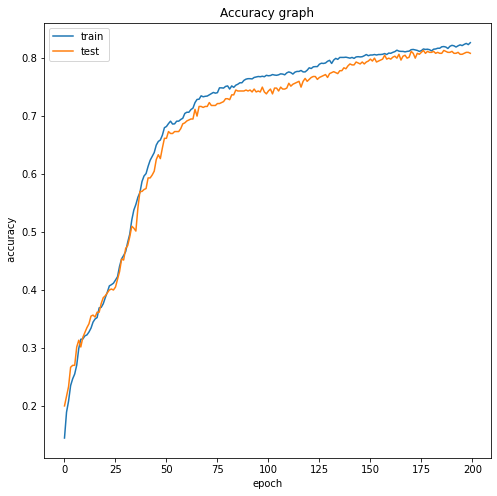

In [61]:
#Accuracy graph plot
plt.figure(figsize=(8,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy graph')
plt.ylabel(' accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

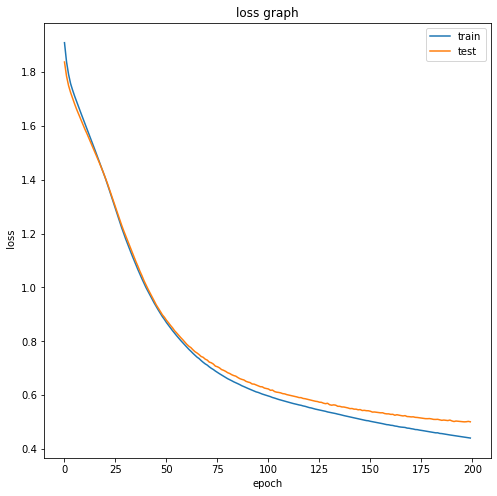

In [62]:
#loss graph plot
plt.figure(figsize=(8,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss graph')
plt.ylabel(' loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [63]:
#random predictions on test data
from numpy import argmax
print("****TEST PREDICTION CHECK*****")

row = X_test[0].tolist()
pred = model.predict([row])
print("1.  Index[1]")
print('\n\t\t Predicted wine quality =' ,argmax(pred))
print("\n\t\t Actual quality =" , (y_test.iloc[0]))

row = X_test[20].tolist()
pred = model.predict([row])
print("3.  Index[20]")
print('\n\t\t Predicted wine quality =' ,argmax(pred))
print("\n\t\t Actual quality =" , (y_test.iloc[20]))


row = X_test[50].tolist()
pred = model.predict([row])
print("4.  Index[50]")
print('\n\t\t Predicted wine quality =' ,argmax(pred))
print("\n\t\t Actual quality =" , (y_test.iloc[50]))


row = X_test[90].tolist()
pred = model.predict([row])
print("5.  Index[90]")
print('\n\t\t Predicted wine quality =' ,argmax(pred))
print("\n\t\t Actual quality =" , (y_test.iloc[90]))

row = X_test[200].tolist()
pred = model.predict([row])
print("2.  Index[100]")
print('\n\t\t Predicted wine quality =' ,argmax(pred))
print("\n\t\t Actual quality =" , (y_test.iloc[200]))

****TEST PREDICTION CHECK*****
1.  Index[1]

		 Predicted wine quality = 5

		 Actual quality = 5
3.  Index[20]

		 Predicted wine quality = 0

		 Actual quality = 0
4.  Index[50]

		 Predicted wine quality = 4

		 Actual quality = 4
5.  Index[90]

		 Predicted wine quality = 0

		 Actual quality = 0
2.  Index[100]

		 Predicted wine quality = 4

		 Actual quality = 4


***

<b>OBSERVATION:</b>

From the above model evaluation, 
* We can infer that,the training set has a loss value = 0.43 and accuracy of = 0.82
* WE can also see that with **150** epochs, the loss value was 1.9 initially and can be seen decreased to 0.43 . 
* Accuracy, from 17% to 82% was acheived in training data. 
* In test data, loss dropped from 1.8 to 0.5 and accuracy improved from 20% to 80%
* In accuracy graph , we can depict that our model isn't overfitting as it  doesn't diverge . It is at par with each other in the same direction.
* The loss graph infers the same. 
* In cell 63, random prediction is done to test the prediction of the model. Index values of [1],[20],[50],[90],[100] are tested on.
* We infer that it performs it's predictions well to a certain extent.


 

***




<hr style="border:01px  solid gray"> </hr>

## <center>CONCLUSION<a name="cln"></a>

<hr style="border:01px  solid gray"> </hr>

* From the above implementation and evalutaion, we can say for this particular model of Predicitng the Wine Quality with 

    1. **TF.estimator model**, the maximum accuracy achieved was 69%.
        * TF estimators are high level api , and isn't well suited for this dataset 
        * as TF estimators are capable of doing high computational. 
        * Therefore, performance could be imporved by having more data.

    2. **TF.keras model**, the maximum score achievable is 80%. 
        * The loss score achieved is 55%. If we had more data, a better fit model could be made. 
        * The loss decreases and accuracy increases. 
        * Regularization played a major role in boosting the performance.

* Model can be improved further by parameter tuning and  cross  validation. It will definitely yield a high computational time and a better model accuracy. Also, another way is to split the wine qulaity type to just 2 states -High and Low and use a sigmoid function for activation and use a loss function of categorical_crossentropy 

<hr style="border:.03px  solid black"> </hr> <a name="ob"></a>
<hr style="border:.03px  solid black"> </hr> <a name="ob"></a>

# <center>OVERALL OBSERVATION</b></center>

**1. With respect to data pre-processing:** 
* Without BoxCox transformation, result yielded was poor. 

**2. With respect to initializing the model and compiling them:**
* Since multi class classification problem : 
    - output layer = softmax
    - loss function = sparse_categorical_crossentropy 
    - Label encoding was done to be able to run the loss function as it accepts only integer format values.  
    - With epoch with 50 , model was highly overfitting . Also with less batch_size input, model performed poorer giving an accuracy of 37%. 
    - Optimizer = Adam gave good results in both models. 

**3.With respect to regularization techniques:**
* With "dropout" regularization technique, the loss value increased and accuracy decreased , as neurons are dropped at random     in the training phase during each iteration. 
* Also , early stopping method didn't produce good outcome. 
* Therfore, L2 regulariztaion technique was opted as it showed very good result sthat overcame overfitting model.
  
**4. With respect to train_test_split:**
* 70:30 ratio split, produced an accuracy of 60% . 
* 80:20 produced 80%. 
* Hence, with more data, the accuracy could be improved along with other factors like parameter tuning and cross validation.  